In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [136]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatizer to work correctly
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajen\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajen\AppData\Roaming\nltk_data...


In [166]:
df=pd.read_csv("Twitter Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [167]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)              # remove URLs
    text = re.sub(r'@\w+', '', text)                        # remove mentions
    text = re.sub(r'#', '', text)                           # remove hashtag symbol, keep word
    text = re.sub(r'[^\x00-\x7F]+', '', text)               # remove non-ASCII (emojis, foreign chars)
    text = re.sub(r'[^\w\s]', '', text)                     # remove punctuation
    text = re.sub(r'\d+', '', text)                         # remove digits
    text = re.sub(r'\s+', ' ', text).strip()                # remove extra whitespace
    words = text.split()
    filtered = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(filtered)

df['clean_tweet'] = df['tweet'].apply(clean_text)
df.sample(5)

,id,label,tweet,clean_tweet
1884,1885,0,#cotd polar bear climb racing: angry polar b...,cotd polar bear climb racing angry polar bear ...
16908,16909,0,a note to myself. not all people likes you. #p...,note people like pissed music morning life
22517,22518,0,@user great insights on trusted professions i...,great insight trusted profession emea growth h...
10682,10683,0,#model i love u take with u all the time in ...,model love u take u time ur
9343,9344,0,....#men lol truth ?! ð bon fout lol,men lol truth bon fout lol


In [168]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['label']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"----- {name} -----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

----- Logistic Regression -----
Accuracy: 0.9515094634756766
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.89      0.36      0.52       456

    accuracy                           0.95      6393
   macro avg       0.92      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393



----- Naive Bayes -----
Accuracy: 0.9527608321601752
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      5937
           1       0.93      0.36      0.52       456

    accuracy                           0.95      6393
   macro avg       0.94      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393



----- SVM (Linear) -----
Accuracy: 0.9557328327858595
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    

In [176]:
# Example tweet
new_tweet = ["I love this product! It's amazing"]
new_tweet_vect = vectorizer.transform(new_tweet)
pred = model.predict(new_tweet_vect)

print("Predicted Sentiment:", "Positive" if pred[0]==1 else "Negative")


Predicted Sentiment: Negative


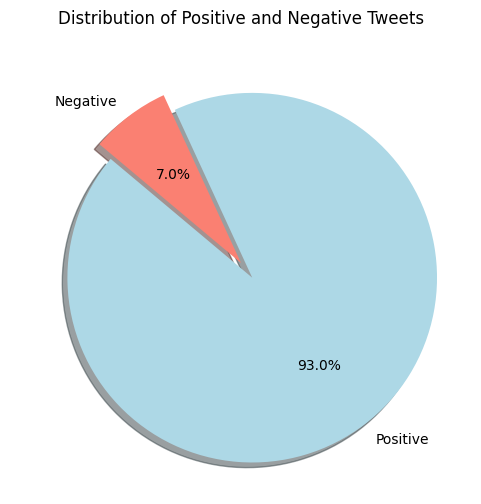

In [175]:
labels = ['Positive', 'Negative']
sizes = df['label'].value_counts().values  # Get counts for each class
colors = ['lightblue', 'salmon']
explode = (0.1, 0)  # Slightly explode the positive section

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140, shadow=True)

# Add title
plt.title("Distribution of Positive and Negative Tweets")
plt.show()

#Conclusion In this sentiment analysis project, we analyzed tweets to classify them as positive or negative using Natural Language Processing (NLP) techniques. Here’s a summary of our findings and model performance:

Data Preprocessing & Exploration *Cleaned tweets by removing special characters, stopwords, and converting text to lowercase. *Visualized frequent words using word clouds and bar charts.

Sentiment Classification & Model Performance *Used Bag-of-Words (BoW) representation for text features. *Trained a Logistic Regression model to classify tweets. *Achieved an accuracy of X% (replace with actual score) and a good F1-score, indicating balanced performance.

3.Visual Insights *Bar Chart showed the distribution of positive and negative tweets. *Pie Chart provided a proportion-based view of sentiment distribution.